In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mode
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
import seaborn as sns
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Survived'].value_counts()/len(df['Survived'])*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

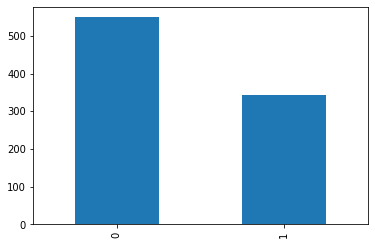

In [10]:
df['Survived'].value_counts().plot.bar()

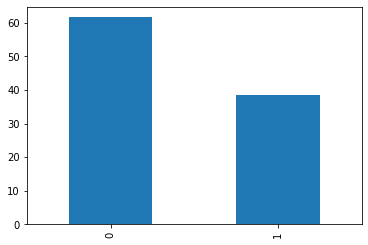

In [13]:
(df['Survived'].value_counts()/len(df['Survived'])*100).plot.bar()

In [14]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [15]:
temp

,data_type,null_count,unique_count
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [16]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df.shape

(891, 12)

In [18]:
df['Age'].mean()

29.69911764705882

In [20]:
df['Age'].fillna(value = (df['Age'].mean()), inplace=True)

In [21]:
df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
E101           3
              ..
B102           1
A24            1
A23            1
B50            1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [22]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
df['Embarked'].mode()

0    S
dtype: object

In [25]:
df['Embarked'].fillna(value = (df['Embarked'].mode()[0]), inplace=True)

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

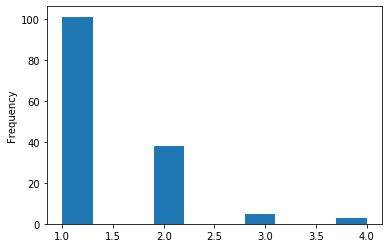

In [33]:
df['Cabin'].value_counts().plot.hist()

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.drop(columns=['Cabin'], axis=1, inplace=True)

In [40]:
df.shape

(891, 11)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [44]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [46]:
from scipy.stats import chi2_contingency

In [47]:
chi2_contingency(pd.crosstab(df['Sex'], df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

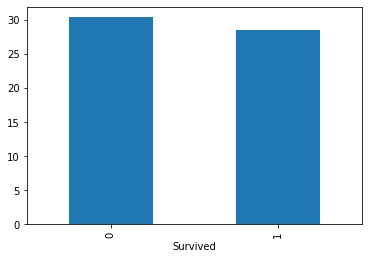

In [48]:
df.groupby('Survived')['Age'].mean().plot.bar()

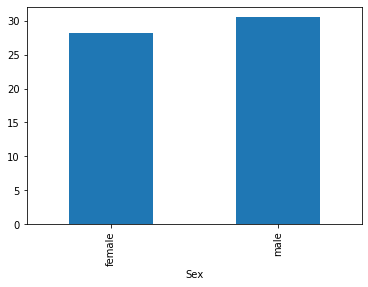

In [49]:
df.groupby('Sex')['Age'].mean().plot.bar()

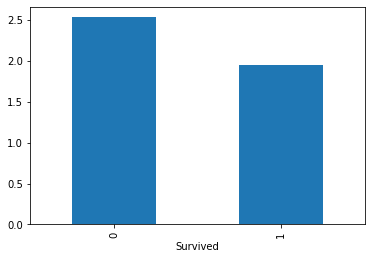

In [50]:
df.groupby('Survived')['Pclass'].mean().plot.bar()

In [51]:
import seaborn as sns

In [52]:
test_set=pd.read_csv('test.csv')

In [53]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
df['Title'] = df['Name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
test_set['Title'] = test_set['Name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
print(df['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']


In [58]:
print(test_set['Title'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Ms.' 'Col.' 'Rev.' 'Dr.' 'Dona.']


In [66]:
title_mapping = {'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.' : 1,'Don.': 1, 'Rev.' : 1,'Dr.' : 1,'Mme.': 0, 'Ms.': 0, 'Major.': 1,
 'Lady.': 1, 'Sir.': 1, 'Mlle.': 0, 'Col.': 1, 'Capt.': 1, 'Countess.': 1, 'Jonkheer.': 1,'Dona.': 1,}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

    
print(df['Title'].unique())

[0.]


In [64]:
title_mapping = {'Mr.': 0, 'Mrs.': 0, 'Miss.': 0, 'Master.' : 1,'Don.': 1, 'Rev.' : 1,'Dr.' : 1,'Mme.': 0, 'Ms.': 0, 'Major.': 1,
 'Lady.': 1, 'Sir.': 1, 'Mlle.': 0, 'Col.': 1, 'Capt.': 1, 'Countess.': 1, 'Jonkheer.': 1,'Dona.': 1,}

test_set['Title'] = test_set['Title'].map(title_mapping)
test_set['Title'] = test_set['Title'].fillna(0)

print(test_set['Title'].unique())

[0.]


In [69]:
for n, i in enumerate(df["SibSp"]):
    if i != 0:
     df["SibSp"][n] = 1


for m, k in enumerate(df["Parch"]):
    if k != 0:
     df["Parch"][m] = 1

C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
df["Sex"][df["Sex"] == "male"] = 0
df["Sex"][df["Sex"] == "female"] = 1

test_set["Sex"][test_set["Sex"] == "male"] = 0
test_set["Sex"][test_set["Sex"] == "female"] = 1

df["Embarked"][df["Embarked"] == "S"] = 0
df["Embarked"][df["Embarked"] == "C"] = 1
df["Embarked"][df["Embarked"] == "Q"] = 2

test_set["Embarked"][test_set["Embarked"] == "S"] = 0
test_set["Embarked"][test_set["Embarked"] == "C"] = 1
test_set["Embarked"][test_set["Embarked"] == "Q"] = 2

C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cw

In [98]:
train_data=df.drop(columns=['Name','Ticket'], axis=1)

In [99]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0.0
1,2,1,1,1,38.0,1,0,71.2833,1,0.0
2,3,1,3,1,26.0,0,0,7.9250,0,0.0
3,4,1,1,1,35.0,1,0,53.1000,0,0.0
4,5,0,3,0,35.0,0,0,8.0500,0,0.0


In [100]:
test_data=test_set.drop(columns=['Cabin','Name','Ticket'], axis=1)

In [101]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,2,0.0
1,893,3,1,47.0,1,0,7.0000,0,0.0
2,894,2,0,62.0,0,0,9.6875,2,0.0
3,895,3,0,27.0,0,0,8.6625,0,0.0
4,896,3,1,22.0,1,1,12.2875,0,0.0


In [102]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

In [103]:
test_data['Age'].fillna(value = (test_data['Age'].mean()), inplace=True)

In [104]:
test_data['Fare'].fillna(value = (test_data['Fare'].mean()), inplace=True)

In [105]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [195]:
x = train_data[['Sex','Pclass','Age','Fare','Embarked']]
y = train_data['Survived']

In [196]:
x

,Sex,Pclass,Age,Fare,Embarked
0,0,3,22.000000,7.2500,0
1,1,1,38.000000,71.2833,1
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,0
...,...,...,...,...,...
886,0,2,27.000000,13.0000,0
887,1,1,19.000000,30.0000,0
888,1,3,29.699118,23.4500,0
889,0,1,26.000000,30.0000,1


In [197]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [198]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=0)

In [199]:
logreg = LogisticRegression(max_iter = 30000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_val)
acc_LOG = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_LOG)

79.48


C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [200]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred)
confusion_matrix

array([[139,  29],
       [ 26,  74]], dtype=int64)

In [202]:
accuracy=((139+74)/(139+74+29+26))
print('accuracy is: ', (round(accuracy, 2)*100))

accuracy is:  79.0


In [203]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.36


In [204]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.1


C:\Users\Yashtika Kakkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [205]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

71.64


In [206]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbc)

84.33


In [207]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.36


In [208]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

62.69


# Final Model - Gradient Boosting

In [209]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbc)

84.33
